In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import tensorflow as tf

import gpflow
from gpflow.utilities import read_values, multiple_assign, set_trainable
from gpflow.inducing_variables import InducingPoints
import gpmaniflow
from gpmaniflow.models.SVGP import SVGP

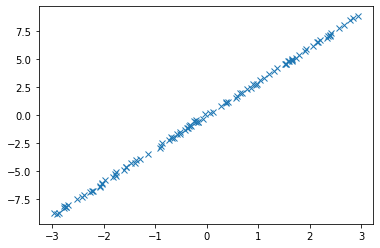

In [2]:
pX = np.linspace(-5.0, 5.0, 300)[:, None]
X = np.random.uniform(-3, 3, 100)[:, None]
Y = 3 * X + np.random.randn(*X.shape) * 0.1
Z = np.linspace(-5, 5, 50)[:, None]

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

plt.plot(X,Y ,"x")

In [3]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(2000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1393.614317034609
Step: 50, Mini batch elbo: -569.670997406234
Step: 100, Mini batch elbo: -221.69569166283094
Step: 150, Mini batch elbo: -166.73225646432206
Step: 200, Mini batch elbo: -153.40550506925487
Step: 250, Mini batch elbo: -149.3643096871158
Step: 300, Mini batch elbo: -146.46579037312364
Step: 350, Mini batch elbo: -144.19557099120723
Step: 400, Mini batch elbo: -141.14660737644112
Step: 450, Mini batch elbo: -138.44136823142588
Step: 500, Mini batch elbo: -136.51944350482498
Step: 550, Mini batch elbo: -132.49543860463936
Step: 600, Mini batch elbo: -129.097900680399
Step: 650, Mini batch elbo: -125.4225026756648
Step: 700, Mini batch elbo: -121.66172089103357
Step: 750, Mini batch elbo: -117.21975606409043
Step: 800, Mini batch elbo: -112.78292786060348
Step: 850, Mini batch elbo: -107.21911493572793
Step: 900, Mini batch elbo: -101.77764569410442
Step: 950, Mini batch elbo: -95.39191331207135
Step: 1000, Mini batch elbo: -88.79022390073577
Ste

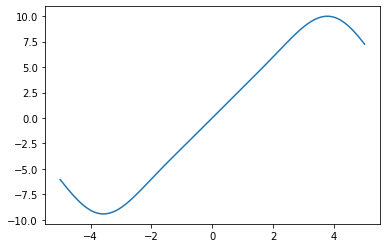

In [7]:
pmu, pvar = model.predict_f(pX)

plt.plot(pX, pmu)

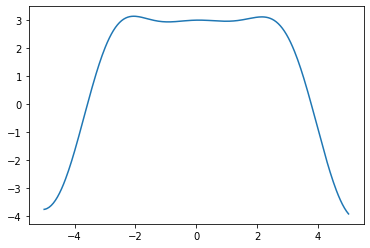

In [6]:
dmu, dvar = model.predict_df(pX)

plt.plot(pX, dmu[:,-1])

## Higher-dimensional input

In [65]:
pX = np.reshape(np.random.uniform(-2, 2, 200*2), [200, 2])
X = np.random.uniform(-3, 3, 200*2)[:, None]
X = np.reshape(X, [200, 2])
Y = 2 * X[:,0] + 1 * X[:,1] + np.random.randn(200) * 0.1
Y = np.reshape(Y, [200,1])
Z = np.random.uniform(-3, 3, 100*2)[:, None]
Z = np.reshape(Z, [100, 2])

train_dataset = tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(1024).batch(len(X))

print(Y.shape)
#plt.plot(X,Y ,"x")

(200, 1)


We again define a model with a SqauredExponential kernel

In [66]:
kernel = gpflow.kernels.SquaredExponential()

model = SVGP(kernel, likelihood = gpflow.likelihoods.Gaussian(), inducing_variable=InducingPoints(Z.copy()))

train_iter = iter(train_dataset.repeat())
training_loss = model.training_loss_closure(train_iter, compile=True)
optimizer = tf.keras.optimizers.Adam(0.01)
@tf.function
def optimization_step():
    optimizer.minimize(training_loss, model.trainable_variables)
elbo_hist = []
for step in range(3000):
    optimization_step()
    if step % 50 == 0:
        minibatch_elbo = -training_loss().numpy()
        print('Step: %s, Mini batch elbo: %s' % (step, minibatch_elbo))
        elbo_hist.append(minibatch_elbo)

ELBO = model.elbo((X,Y))

Step: 0, Mini batch elbo: -1853.8937703921783
Step: 50, Mini batch elbo: -865.3563992937397
Step: 100, Mini batch elbo: -381.4405650283744
Step: 150, Mini batch elbo: -309.56158514459804
Step: 200, Mini batch elbo: -291.40738753796785
Step: 250, Mini batch elbo: -279.9798808945286
Step: 300, Mini batch elbo: -270.6675794298697
Step: 350, Mini batch elbo: -261.619273115683
Step: 400, Mini batch elbo: -252.39454185791627
Step: 450, Mini batch elbo: -243.1564123893897
Step: 500, Mini batch elbo: -234.9416204323483
Step: 550, Mini batch elbo: -222.06650003604636
Step: 600, Mini batch elbo: -211.39975470261334
Step: 650, Mini batch elbo: -197.34640655929286
Step: 700, Mini batch elbo: -184.28112410830056
Step: 750, Mini batch elbo: -166.7267861291518
Step: 800, Mini batch elbo: -151.24310299749516
Step: 850, Mini batch elbo: -130.19908599616295
Step: 900, Mini batch elbo: -108.87882977970861
Step: 950, Mini batch elbo: -87.02294200240564
Step: 1000, Mini batch elbo: -63.240498219660026
Step

<tf.Tensor: shape=(1, 2), dtype=float64, numpy=array([[1.89891422, 0.87483068]])>

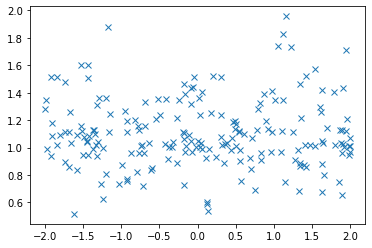

In [69]:
dmu, dvar = model.predict_df(pX)
plt.plot(pX[:,0], dmu[:,:,1], "x")
dmu[2,:,:]

In [72]:
kernel.lengthscales

<Parameter: dtype=float64, shape=[], fn="softplus", numpy=3.6699242081623598>